In [62]:
import pandas as pd
import tabula as tb
import seaborn as sns
import matplotlib.pylab as plt

from datetime import datetime, timedelta
sns.set(rc={"figure.dpi": 200, 'savefig.dpi': 200})
sns.set_context('notebook')
sns.set_style("ticks")


In [6]:
def getPDFpath(year,month,day):
    #For some weird reason the filenames seem to change from day to day among these three
    bp = [
        "https://www.nicd.ac.za/wp-content/uploads/YEAR/MM/NICD-COVID-19-Daily-Sentinel-Hospital-Surveillance-report-National-YEARMMDD.pdf" ,
        "https://www.nicd.ac.za/wp-content/uploads/YEAR/MM/Datcov-National-Report-YEARMMDD.pdf",
        "https://www.nicd.ac.za/wp-content/uploads/YEAR/MM/Datcov19_National_Export-YEARMMDD.pdf"
    ]

    for i in range(len(bp)):
        bp[i] = bp[i].replace("YEAR", str(year), 2)
        bp[i] = bp[i].replace("MM", "%02d" % month, 2)
        bp[i] = bp[i].replace("DD", "%02d" % day)

    return bp
    


def getTableFromPDF(year, month, day):
    #these are the coords of the table we want to extract
    pages=[5]
    boxCM = [3.3,0,10.1,25]
    boxPts = [v * 28.28 for v in boxCM]

    fnames = getPDFpath(year,month,day)
    
    for f in fnames:
        try:
            df = tb.read_pdf(f, pages=pages, area=[boxPts] )
            print ("fetched %s" % f)
            df[1]['Date'] = "%s/%02d/%02d" % (year,month,day)

            return df[1]
        
        except:
            pass
    
    print ('No file available for %s/%02d/%02d' % (year,month,day))



In [7]:
#fetch all data from November 25 to December 8

start_date = datetime(2021,11,25)
end_date = datetime(2021,12,8)
delta = timedelta(days=1)

temp_dt = []
while start_date <= end_date:
    temp_dt.append(getTableFromPDF(year=start_date.year, month=start_date.month, day=start_date.day))
    start_date += delta

fetched https://www.nicd.ac.za/wp-content/uploads/2021/11/Datcov-National-Report-20211125.pdf
fetched https://www.nicd.ac.za/wp-content/uploads/2021/11/Datcov-National-Report-20211126.pdf
fetched https://www.nicd.ac.za/wp-content/uploads/2021/11/Datcov-National-Report-20211127.pdf
fetched https://www.nicd.ac.za/wp-content/uploads/2021/11/Datcov-National-Report-20211128.pdf
fetched https://www.nicd.ac.za/wp-content/uploads/2021/11/Datcov19_National_Export-20211129.pdf
fetched https://www.nicd.ac.za/wp-content/uploads/2021/11/Datcov19_National_Export-20211130.pdf
fetched https://www.nicd.ac.za/wp-content/uploads/2021/12/Datcov19_National_Export-20211201.pdf
fetched https://www.nicd.ac.za/wp-content/uploads/2021/12/Datcov19_National_Export-20211202.pdf
fetched https://www.nicd.ac.za/wp-content/uploads/2021/12/Datcov19_National_Export-20211203.pdf
fetched https://www.nicd.ac.za/wp-content/uploads/2021/12/NICD-COVID-19-Daily-Sentinel-Hospital-Surveillance-report-National-20211204.pdf
fetche

In [53]:
dt = pd.concat(temp_dt, ignore_index=True)
dt.columns = dt.columns.str.replace('\r',' ')
dt.columns = dt.columns.str.replace(' ','')

In [54]:
dt

,Facilities Reporting,Admissions to Date,Died to Date,Discharged to date,Currently Admitted,Currently in ICU,Currently Ventilated,Currently Oxygenated,Admissions in Previous Day,Date,Province
0,18,13240.0,3180.0,9966.0,25.0,3.0,3.0,6.0,0.0,2021/11/25,NaN
1,20,11986.0,2135.0,9662.0,24.0,5.0,6.0,1.0,2.0,2021/11/25,NaN
2,94,72478.0,13790.0,57812.0,395.0,50.0,18.0,50.0,32.0,2021/11/25,NaN
3,47,37407.0,6908.0,29938.0,167.0,27.0,14.0,42.0,4.0,2021/11/25,NaN
4,7,7627.0,1638.0,5850.0,4.0,0.0,0.0,1.0,0.0,2021/11/25,NaN
...,...,...,...,...,...,...,...,...,...,...,...
130,7,7761.0,1638.0,5944.0,43.0,2.0,0.0,2.0,6.0,2021/12/08,Limpopo
131,9,9761.0,1601.0,8010.0,68.0,3.0,2.0,4.0,5.0,2021/12/08,Mpumalanga
132,13,10971.0,1615.0,8859.0,65.0,11.0,7.0,9.0,2.0,2021/12/08,North West
133,6,4781.0,800.0,3730.0,15.0,2.0,3.0,2.0,0.0,2021/12/08,Northern Cape


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

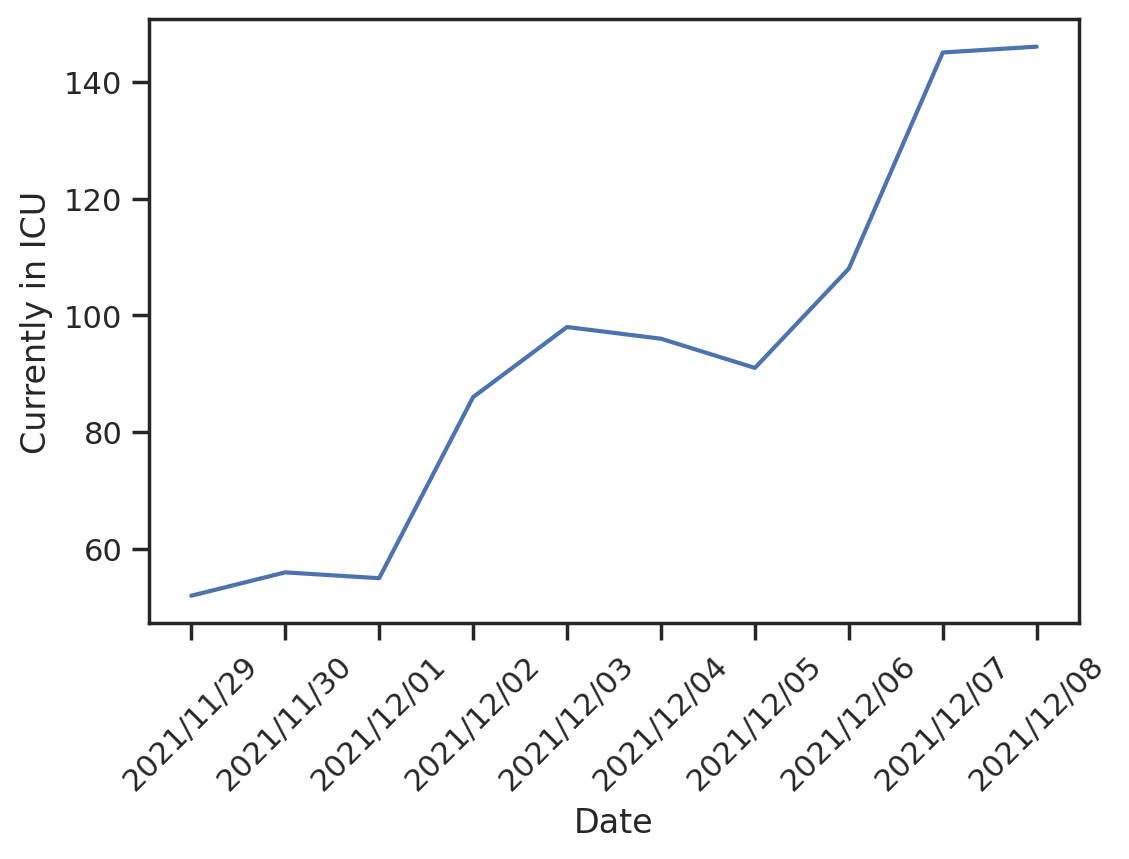

In [64]:
sns.lineplot(data=dt[dt.Province=='Gauteng'], x='Date', y='Currently in ICU')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'ICU Occupancy in South Africa')

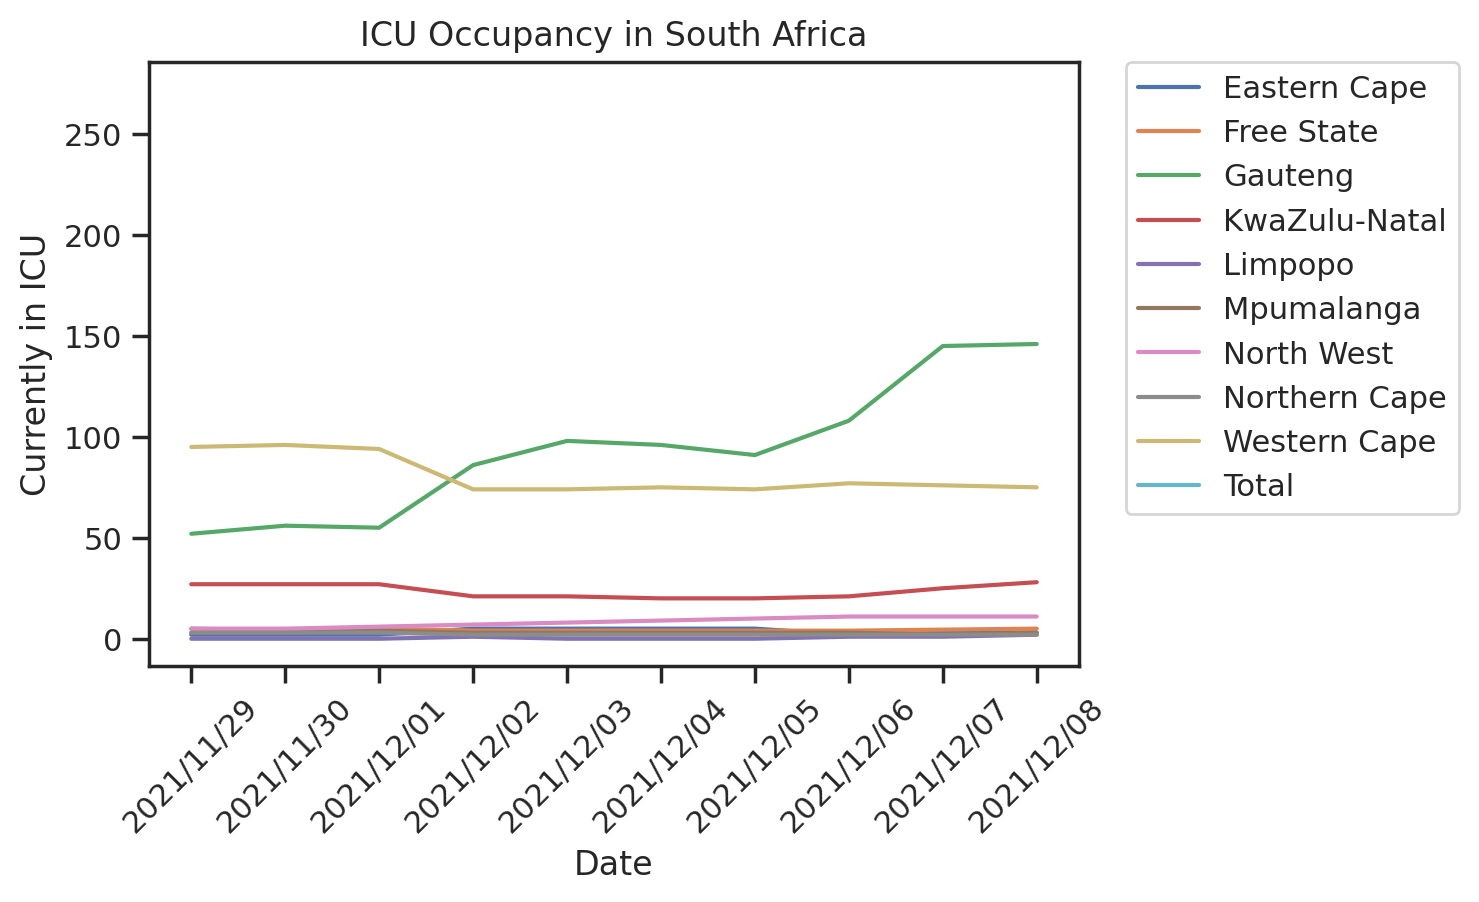

In [69]:
sns.lineplot(data=dt, x='Date', y='Currently in ICU', hue="Province")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('ICU Occupancy in South Africa')